# Analysis Jupyter Notebook
### Controlla il path della cartella

### Data Handling

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib.colors import ListedColormap

%pwd
#%cd /media/data/emanuele/TTR/smog-to-gromos/old/fix-concentration_gradient/make_fibrillone-2000-296K-1mM-bis/analysis

### Data import

matrix = pd.read_csv('histo-time.dat', sep = '\\s+', header = None)

# Changing the index so now it is in picoseconds
#matrix[0] = matrix[0].apply(lambda x:x*10)
#matrix = matrix.set_index([0])

### Data handling
#### Defining the Maxclust and the number of frames
clustsize = list(range(0, len(matrix.columns), 1))
frames = list(range(0, len(matrix.index), 1))
fibril = list(range(2, len(matrix.columns)))
#not_fibril = list(range(3, 10, 1))


#### Multiply the columns for its clustsize
size = pd.Series(clustsize)
matrix = matrix.mul(size, axis = 1)

#### Replace 0 with n.an
matrix[matrix == 0] = np.nan

#### I don't care about monomers
matrix = matrix.drop([0, 1], axis = 1)

### Make the histogram to compare with lab results
# Set the not-fibril to 0 and have a sort of lag time 
histo_zero = matrix.copy()
histo_zero[[2, 3, 4, 5, 6, 7, 8, 9, 10]] = 0
histo_zero = histo_zero[fibril].sum(axis=1)

# This one is the complete one
histogram = matrix[fibril].sum(axis=1)

# Matrix transpose
matrix = matrix.T




#print(matrix)
#print(maxclust) # seems ok
#print(frames) # seems ok

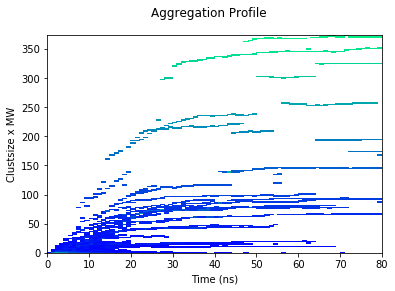

In [2]:
#prova = ListedColormap(['darkorange', 'gold', 'lawngreen', 'lightseagreen'])
plt.pcolormesh(matrix, cmap = 'winter', rasterized = True)
plt.ylabel('Clustsize x MW')
plt.xlabel('Time (ns)')
#splt.xlim(0, 1200)
plt.suptitle('Aggregation Profile')
plt.show()


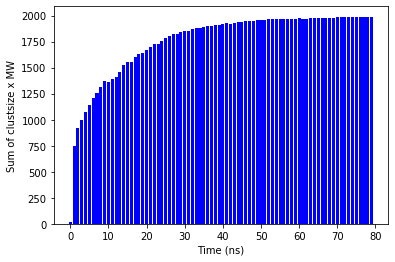

In [3]:
plt.bar(frames, histogram, color = 'blue')
plt.ylabel('Sum of clustsize x MW')
plt.xlabel('Time (ns)')
#plt.xlim(0, 1200)
plt.show()

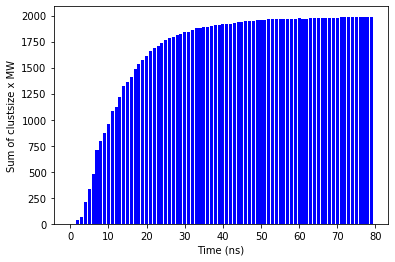

In [4]:
plt.bar(frames, histo_zero, color = 'blue')
plt.ylabel('Sum of clustsize x MW')
plt.xlabel('Time (ns)')
#plt.xlim(0, 1200)
plt.show()